# Architectural Basics

## Concepts Used
1. 3x3 Convolutions 
2. 1x1 Convolutions
3. MaxPooling
4. SoftMax

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot


from keras.datasets import mnist

from IPython.display import Image

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


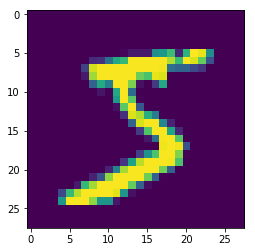

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
def plot_loss_and_accuracy(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  
  plt.rc_context({'figure.facecolor':'white'})
  fig = plt.figure(figsize=(15,5))
  
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, color='red', label='Training loss')
  plt.plot(epochs, val_loss, color='green', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, color='red', label='Training acc')
  plt.plot(epochs, val_acc, color='green', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [0]:
from keras.layers import Activation
model = Sequential()

# Convolution Block 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu')) #26

# Transition Block
model.add(MaxPooling2D(pool_size=(2,2))) #12
model.add(Convolution2D(10, 1, 1, activation='relu')) #12

# Convoltion Block
model.add(Convolution2D(16, 3, 3, activation='relu')) #10
model.add(Convolution2D(16, 3, 3, activation='relu')) #8
model.add(Convolution2D(16, 3, 3, activation='relu')) #6


model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWa

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        650       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 16)          2320      
__________

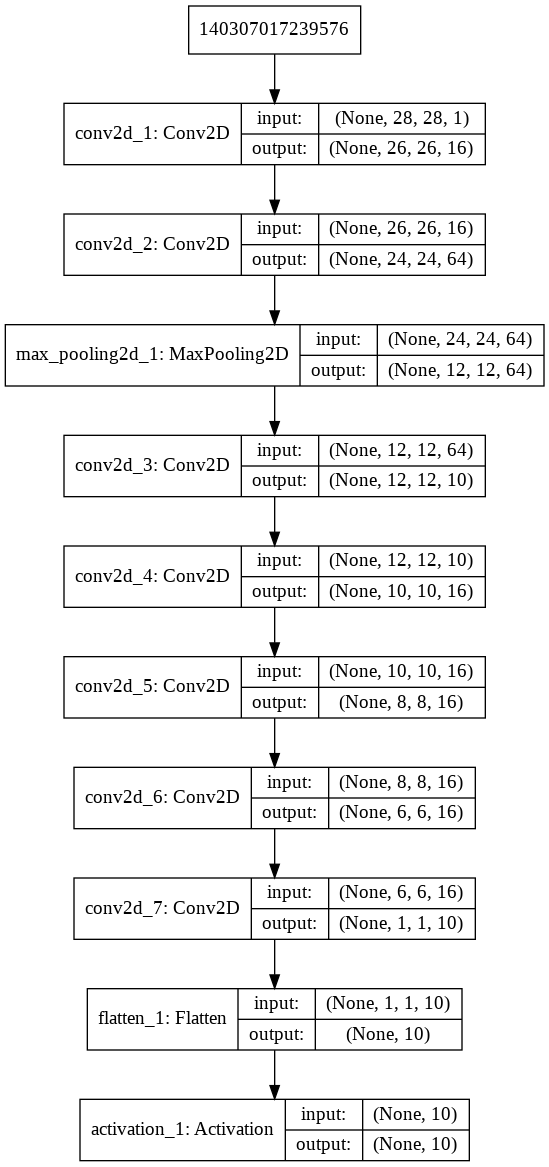

In [0]:
model.summary()


plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model.png')

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.1883 - acc: 0.9424 - val_loss: 0.0677 - val_acc: 0.9799
Epoch 2/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0639 - acc: 0.9804 - val_loss: 0.0462 - val_acc: 0.9871
Epoch 3/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0474 - acc: 0.9852 - val_loss: 0.0444 - val_acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0384 - acc: 0.9880 - val_loss: 0.0384 - val_acc: 0.9873
Epoch 5/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0325 - acc: 0.9895 - val_loss: 0.0318 - val_acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0276 - acc: 0.9914 - val_loss: 0.0373 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0249 - acc: 0.9921 - val_loss: 0.

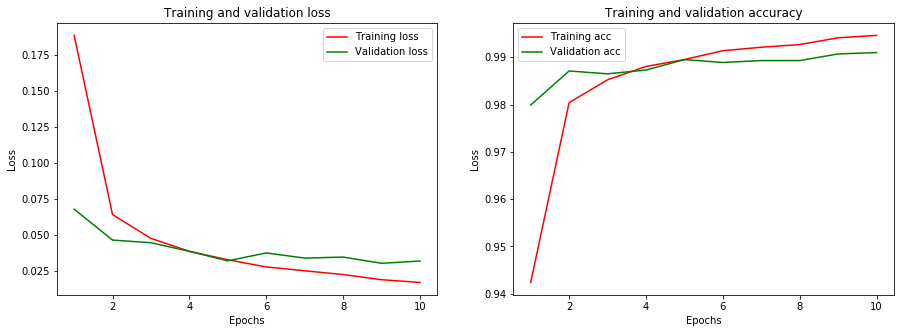

In [0]:
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

plot_loss_and_accuracy(history)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03166976164939333, 0.991]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.4356699e-11 6.3027534e-09 3.0721516e-08 2.6876610e-06 1.7663392e-16
  1.0547174e-12 1.0911649e-25 9.9999726e-01 6.1917221e-10 2.7678293e-08]
 [4.9503295e-09 1.9137829e-08 1.0000000e+00 1.4858629e-12 5.8549443e-11
  2.4088258e-14 9.9405839e-10 4.3760319e-16 6.9534517e-10 3.5833733e-18]
 [1.1408803e-09 9.9998975e-01 2.5602648e-07 6.7362120e-09 1.4631698e-07
  1.0747543e-06 3.2712183e-08 8.5556121e-06 2.0671109e-07 3.9739372e-09]
 [9.9999976e-01 7.8119926e-15 7.7403993e-11 2.2465617e-10 6.8427941e-12
  2.9341154e-08 2.4790964e-07 1.1420989e-11 2.2942526e-09 2.0149586e-09]
 [6.7530521e-12 3.8598607e-14 4.8758020e-15 7.1188625e-16 9.9999893e-01
  2.1341798e-11 1.0214051e-09 2.4484619e-13 6.0585405e-11 1.0313112e-06]
 [3.9745798e-10 9.9999559e-01 3.0852547e-07 9.8730080e-10 1.1182091e-07
  7.3528895e-08 2.3997334e-08 3.7158197e-06 1.6909350e-07 3.5124701e-09]
 [2.3716927e-20 1.2593687e-08 3.0109320e-12 2.8878772e-14 9.9991703e-01
  4.7419891e-11 3.0960660e-14 3.3098281e-08 8.2895465e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

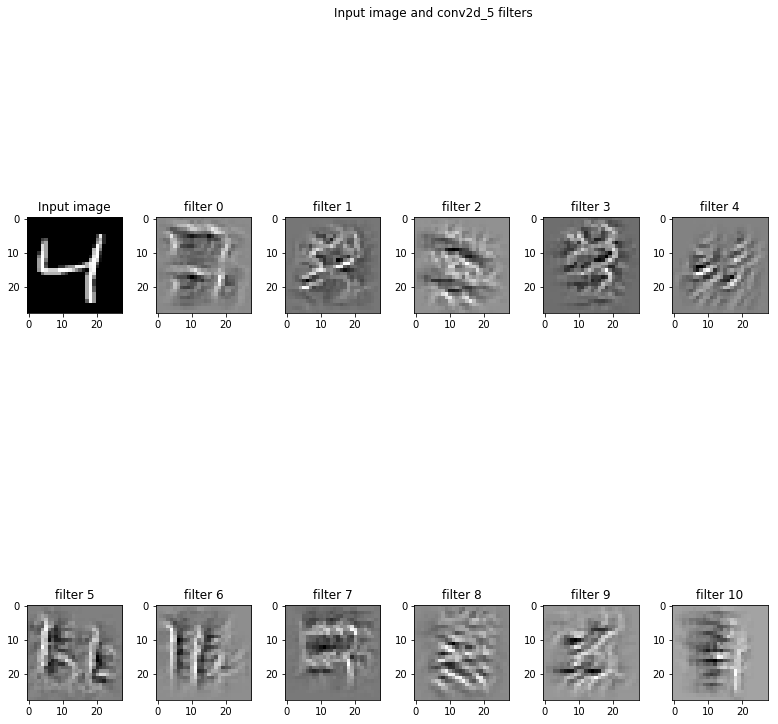

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_5')